In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [25]:
#import df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/police_survey_cleaned_Q1.csv"

police_survey_df = pd.read_csv(data_file)

#Research Question 1.
## How has awareness of police inadequacies changed from baseline to endline?

In [26]:
#I will begin by performing analysis at the aggregate level for the treatment and control groups

police_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1051 non-null   int64  
 1   uid                  1051 non-null   int64  
 2   gender               1051 non-null   object 
 3   e_wcase              1051 non-null   object 
 4   e_effective          1051 non-null   object 
 5   e_sensitivity        1051 non-null   float64
 6   treatment            1051 non-null   object 
 7   regular_whd          1051 non-null   float64
 8   women_whd            1051 non-null   float64
 9   b_uid                1051 non-null   int64  
 10  b_wcase              1051 non-null   object 
 11  b_effective          1051 non-null   object 
 12  b_sensitivity        1051 non-null   float64
 13  e_wcase_encoded      1051 non-null   float64
 14  b_wcase_encoded      1051 non-null   float64
 15  e_effective_encoded  1051 non-null   f

In [27]:
#looks like we have a variable that has index values. Will drop this variable

#reviewing table

police_survey_df.tail(5)

,Unnamed: 0,uid,gender,e_wcase,e_effective,e_sensitivity,treatment,regular_whd,women_whd,b_uid,b_wcase,b_effective,b_sensitivity,e_wcase_encoded,b_wcase_encoded,e_effective_encoded,b_effective_encoded
1046,1063,3257338,male,enough attention,very effective,6.0,Treatment,1.0,0.0,3257265,too much attention,effective,6.0,1.0,2.0,4.0,3.0
1047,1064,3257336,male,too much attention,effective,8.0,Treatment,1.0,0.0,3257266,too much attention,very effective,12.0,2.0,2.0,3.0,4.0
1048,1065,3257339,male,enough attention,effective,4.0,Treatment,1.0,0.0,3257269,too much attention,very effective,4.0,1.0,2.0,3.0,4.0
1049,1066,3257341,male,too much attention,effective,7.0,Treatment,1.0,0.0,3257270,too much attention,effective,5.0,2.0,2.0,3.0,3.0
1050,1067,3257340,male,enough attention,very effective,8.0,Treatment,1.0,0.0,3257271,enough attention,very effective,7.0,1.0,1.0,4.0,4.0


In [28]:
#Dropping redundant variables & other variables that will not be used

police_survey_df.drop(columns = ["Unnamed: 0","b_sensitivity","e_sensitivity" ], inplace = True)


In [29]:
#Reviewing detailed statistics

police_survey_df.describe()

,uid,regular_whd,women_whd,b_uid,e_wcase_encoded,b_wcase_encoded,e_effective_encoded,b_effective_encoded
count,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000
mean,2.598995e+06,0.336822,0.346337,2.599010e+06,1.737393,1.700285,3.578497,3.626070
std,2.974610e+05,0.472848,0.476029,2.974574e+05,0.446703,0.468625,0.532983,0.558949
min,2.141733e+06,0.000000,0.000000,2.141762e+06,0.000000,0.000000,0.000000,0.000000
25%,2.353638e+06,0.000000,0.000000,2.353566e+06,1.000000,1.000000,3.000000,3.000000
50%,2.551631e+06,0.000000,0.000000,2.551561e+06,2.000000,2.000000,4.000000,4.000000
75%,2.750940e+06,1.000000,1.000000,2.750870e+06,2.000000,2.000000,4.000000,4.000000
max,3.257341e+06,1.000000,1.000000,3.257271e+06,2.000000,2.000000,4.000000,4.000000


As the mean of "_wcase" is from 1.70 to 1.73 it seems like the majority of respondents at baseline and endline think too much attention is placed on women cases.

##Let's start by visualizing our data.

In [30]:
#Let's look as endline effectiveness for the different treatment groups
#As there are two different treatment groups it might be good to separate these out

#Creating new data frame for regular and Women_whd
whd_df = police_survey_df[(police_survey_df["regular_whd"] != 1)]

regular_df = police_survey_df[(police_survey_df["women_whd"] != 1)]


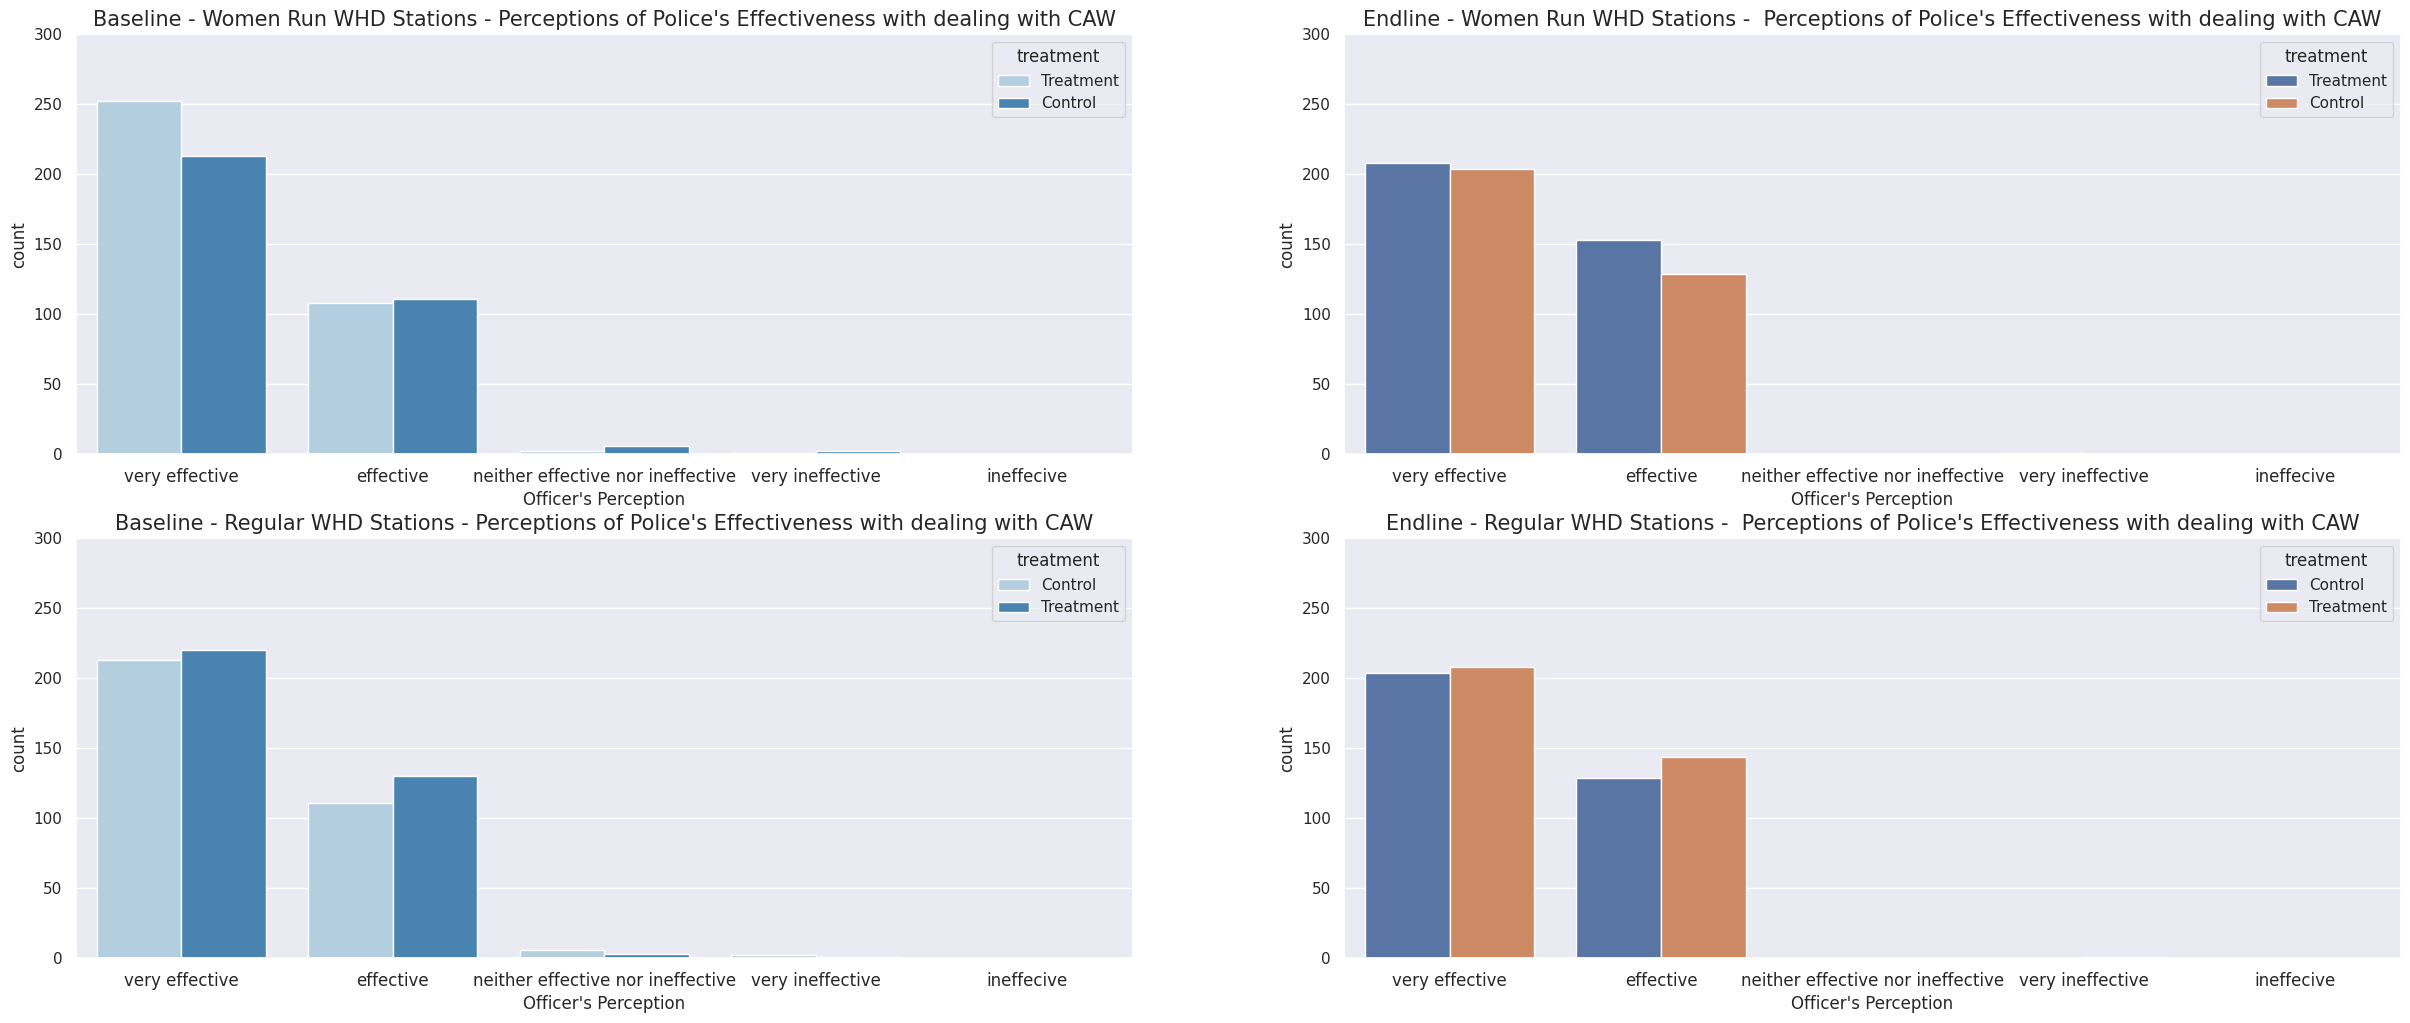

In [31]:
#Creating visuals for both treatment groups against the control group for officers perception of police effectiveness

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12))

# Flatten axes array
axes = axes.flatten()

#Creating order for categories
cat_order = ["very effective", "effective", "neither effective nor ineffective", "very ineffective", "ineffecive"]

# Create a count plot for Women Run WHD
_ = sns.countplot(data = whd_df, x= "b_effective", hue = "treatment", ax = axes[0], palette= "Blues", order = cat_order)
_ = sns.countplot(data = whd_df, x= "e_effective", hue = "treatment", ax = axes[1], order = cat_order)

#Create a count plot for regular WHD
_ = sns.countplot(data = regular_df, x= "b_effective", hue = "treatment", ax = axes[2], palette= "Blues", order = cat_order)
_ = sns.countplot(data = regular_df, x= "e_effective", hue = "treatment", ax = axes[3], order = cat_order)

#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[1].set_title("Endline - Women Run WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[2].set_title("Baseline - Regular WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[3].set_title("Endline - Regular WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
#setting axis labels
_ = axes[0].set_xlabel("Officer's Perception")
_ = axes[1].set_xlabel("Officer's Perception")
_ = axes[2].set_xlabel("Officer's Perception")
_ = axes[3].set_xlabel("Officer's Perception")

_ = axes[0].tick_params(axis='x', labelsize=12)
_ = axes[1].tick_params(axis='x', labelsize=12)
_ = axes[2].tick_params(axis='x', labelsize=12)
_ = axes[3].tick_params(axis='x', labelsize=12)

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,300])
  axes[i].set_autoscaley_on(False)

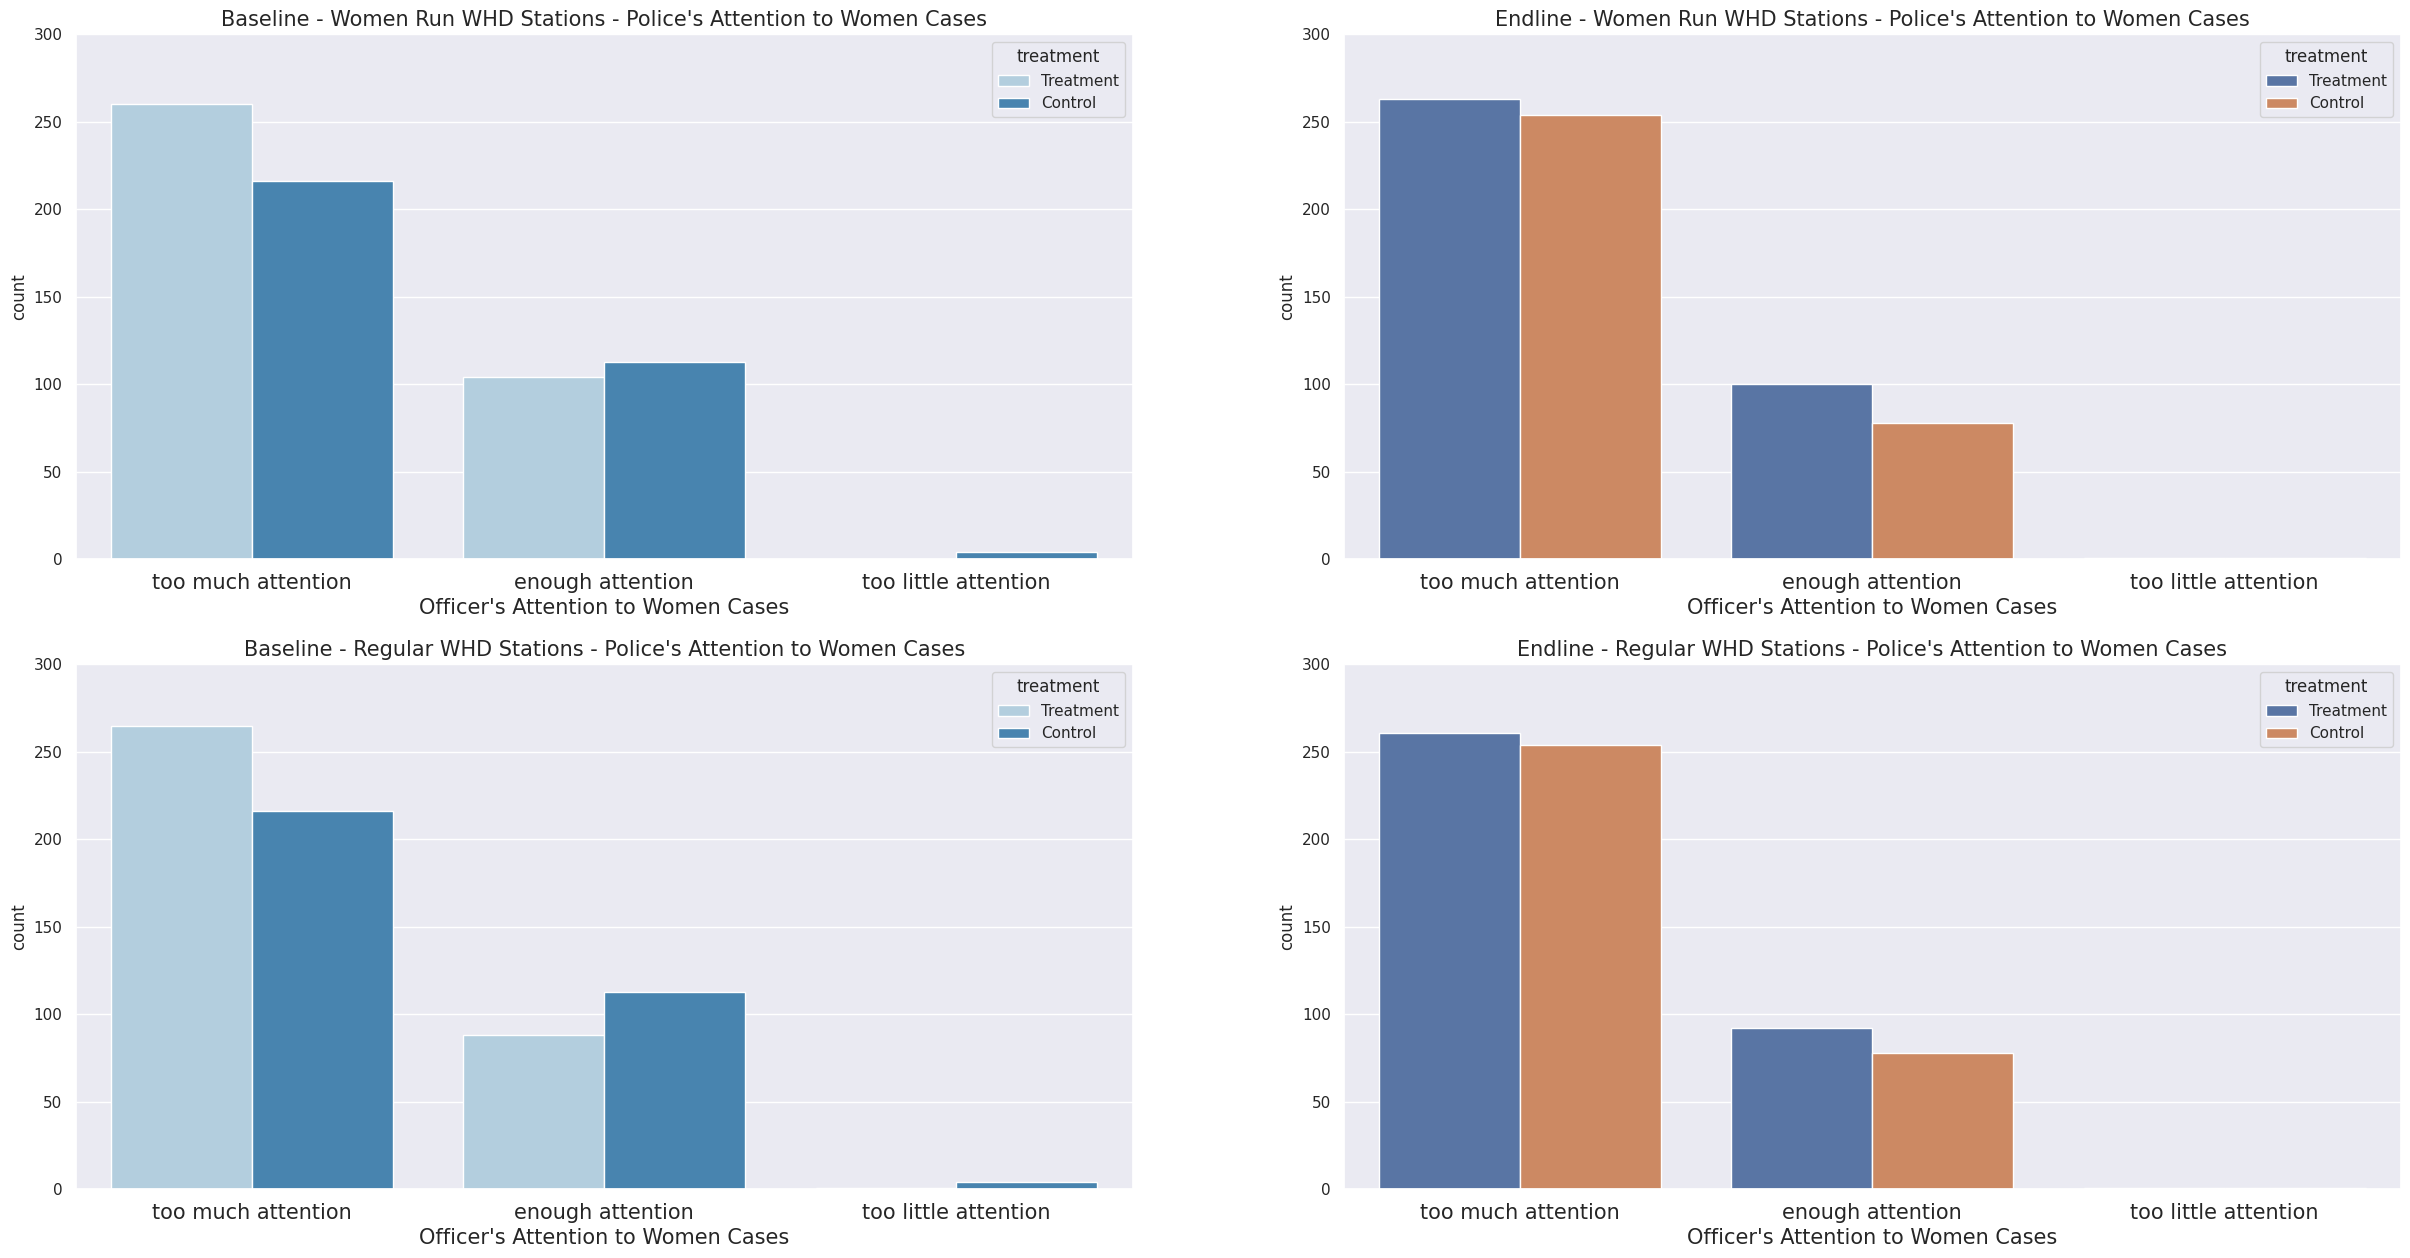

In [32]:
#Creating visuals for both treatment groups against the control group for Polices's attention to women cases

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30,15))

#flatten the axis
axes = axes.flatten()

#creating order for categories
cat_order = ["too much attention","enough attention", "too little attention"]
hue_ord = ['Treatment', "Control"]
# Create a count plot for Women Run
_ = sns.countplot(data = whd_df, x= "b_wcase", hue = "treatment", ax = axes[0], palette= "Blues", order = cat_order)
_ = sns.countplot(data = whd_df, x= "e_wcase", hue = "treatment", ax = axes[1])
_ = sns.countplot(data = regular_df, x= "b_wcase", hue = "treatment", ax = axes[2], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = regular_df, x= "e_wcase", hue = "treatment", ax = axes[3], order = cat_order, hue_order = hue_ord)

#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Police's Attention to Women Cases", size = 15)
axes[1].set_title("Endline - Women Run WHD Stations - Police's Attention to Women Cases", size = 15)
axes[2].set_title("Baseline - Regular WHD Stations - Police's Attention to Women Cases", size = 15)
axes[3].set_title("Endline - Regular WHD Stations - Police's Attention to Women Cases", size = 15)


#Setting axis labels
_ = axes[0].set_xlabel("Officer's Attention to Women Cases", size = 15)
_ = axes[1].set_xlabel("Officer's Attention to Women Cases",size = 15 )
_ = axes[2].set_xlabel("Officer's Attention to Women Cases", size = 15)
_ = axes[3].set_xlabel("Officer's Attention to Women Cases", size = 15)

#increase tick label size
_ = axes[0].tick_params(axis='x', labelsize=15)
_ = axes[1].tick_params(axis='x', labelsize=15)
_ = axes[2].tick_params(axis='x', labelsize=15)
_ = axes[3].tick_params(axis='x', labelsize=15)

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,300])
  axes[i].set_autoscaley_on(False)

In [34]:
#Lets dive in deeper by looking at the detailed statistics by treatment groups

numerical_columns = ["e_wcase_encoded","b_wcase_encoded","e_effective_encoded","b_effective_encoded"]

police_survey_df.groupby("treatment")[numerical_columns].agg(['mean', 'std', 'min', 'max']).T



treatment                  Control  Treatment
e_wcase_encoded     mean  1.759760   1.727019
                    std   0.434855   0.452015
                    min   0.000000   0.000000
                    max   2.000000   2.000000
b_wcase_encoded     mean  1.636637   1.729805
                    std   0.506087   0.447498
                    min   0.000000   0.000000
                    max   2.000000   2.000000
e_effective_encoded mean  3.612613   3.562674
                    std   0.487886   0.552261
                    min   3.000000   0.000000
                    max   4.000000   4.000000
b_effective_encoded mean  3.597598   3.639276
                    std   0.606387   0.535455
                    min   0.000000   0.000000
                    max   4.000000   4.000000

#Interesting observations

##Observations for effectivess variable

Treatment Group
*   Perceived effectiveness in dealing with women cases declined slightly.
*   Potentially showing awareness in police and inadequacies

Control Group

*   Perceived effectiveness increased.
*   Shows the lack of awareness of police inadequacies

#Observations for attentiveness

Treatment Group

*   Attentiveness stayed the same from baseline to end line

Control Group

*  An increase in attentiveness from baseline to end line

----------------------------------------------------------------------------

###First Note

###The differences in baseline means for the different treatment groups are relatively the same. This makes intuitive sense as none of the treatment groups received the treatment at baseline.

###Second Note
###The high values found in our aggregate descriptive stats seem to be part of both the treatment and control groups. Leading me to believe it is more likely part of the distribution




In [35]:
Reg_stats_df = regular_df.groupby("treatment")[numerical_columns].mean()
W_stats_df = whd_df.groupby("treatment")[numerical_columns].mean()

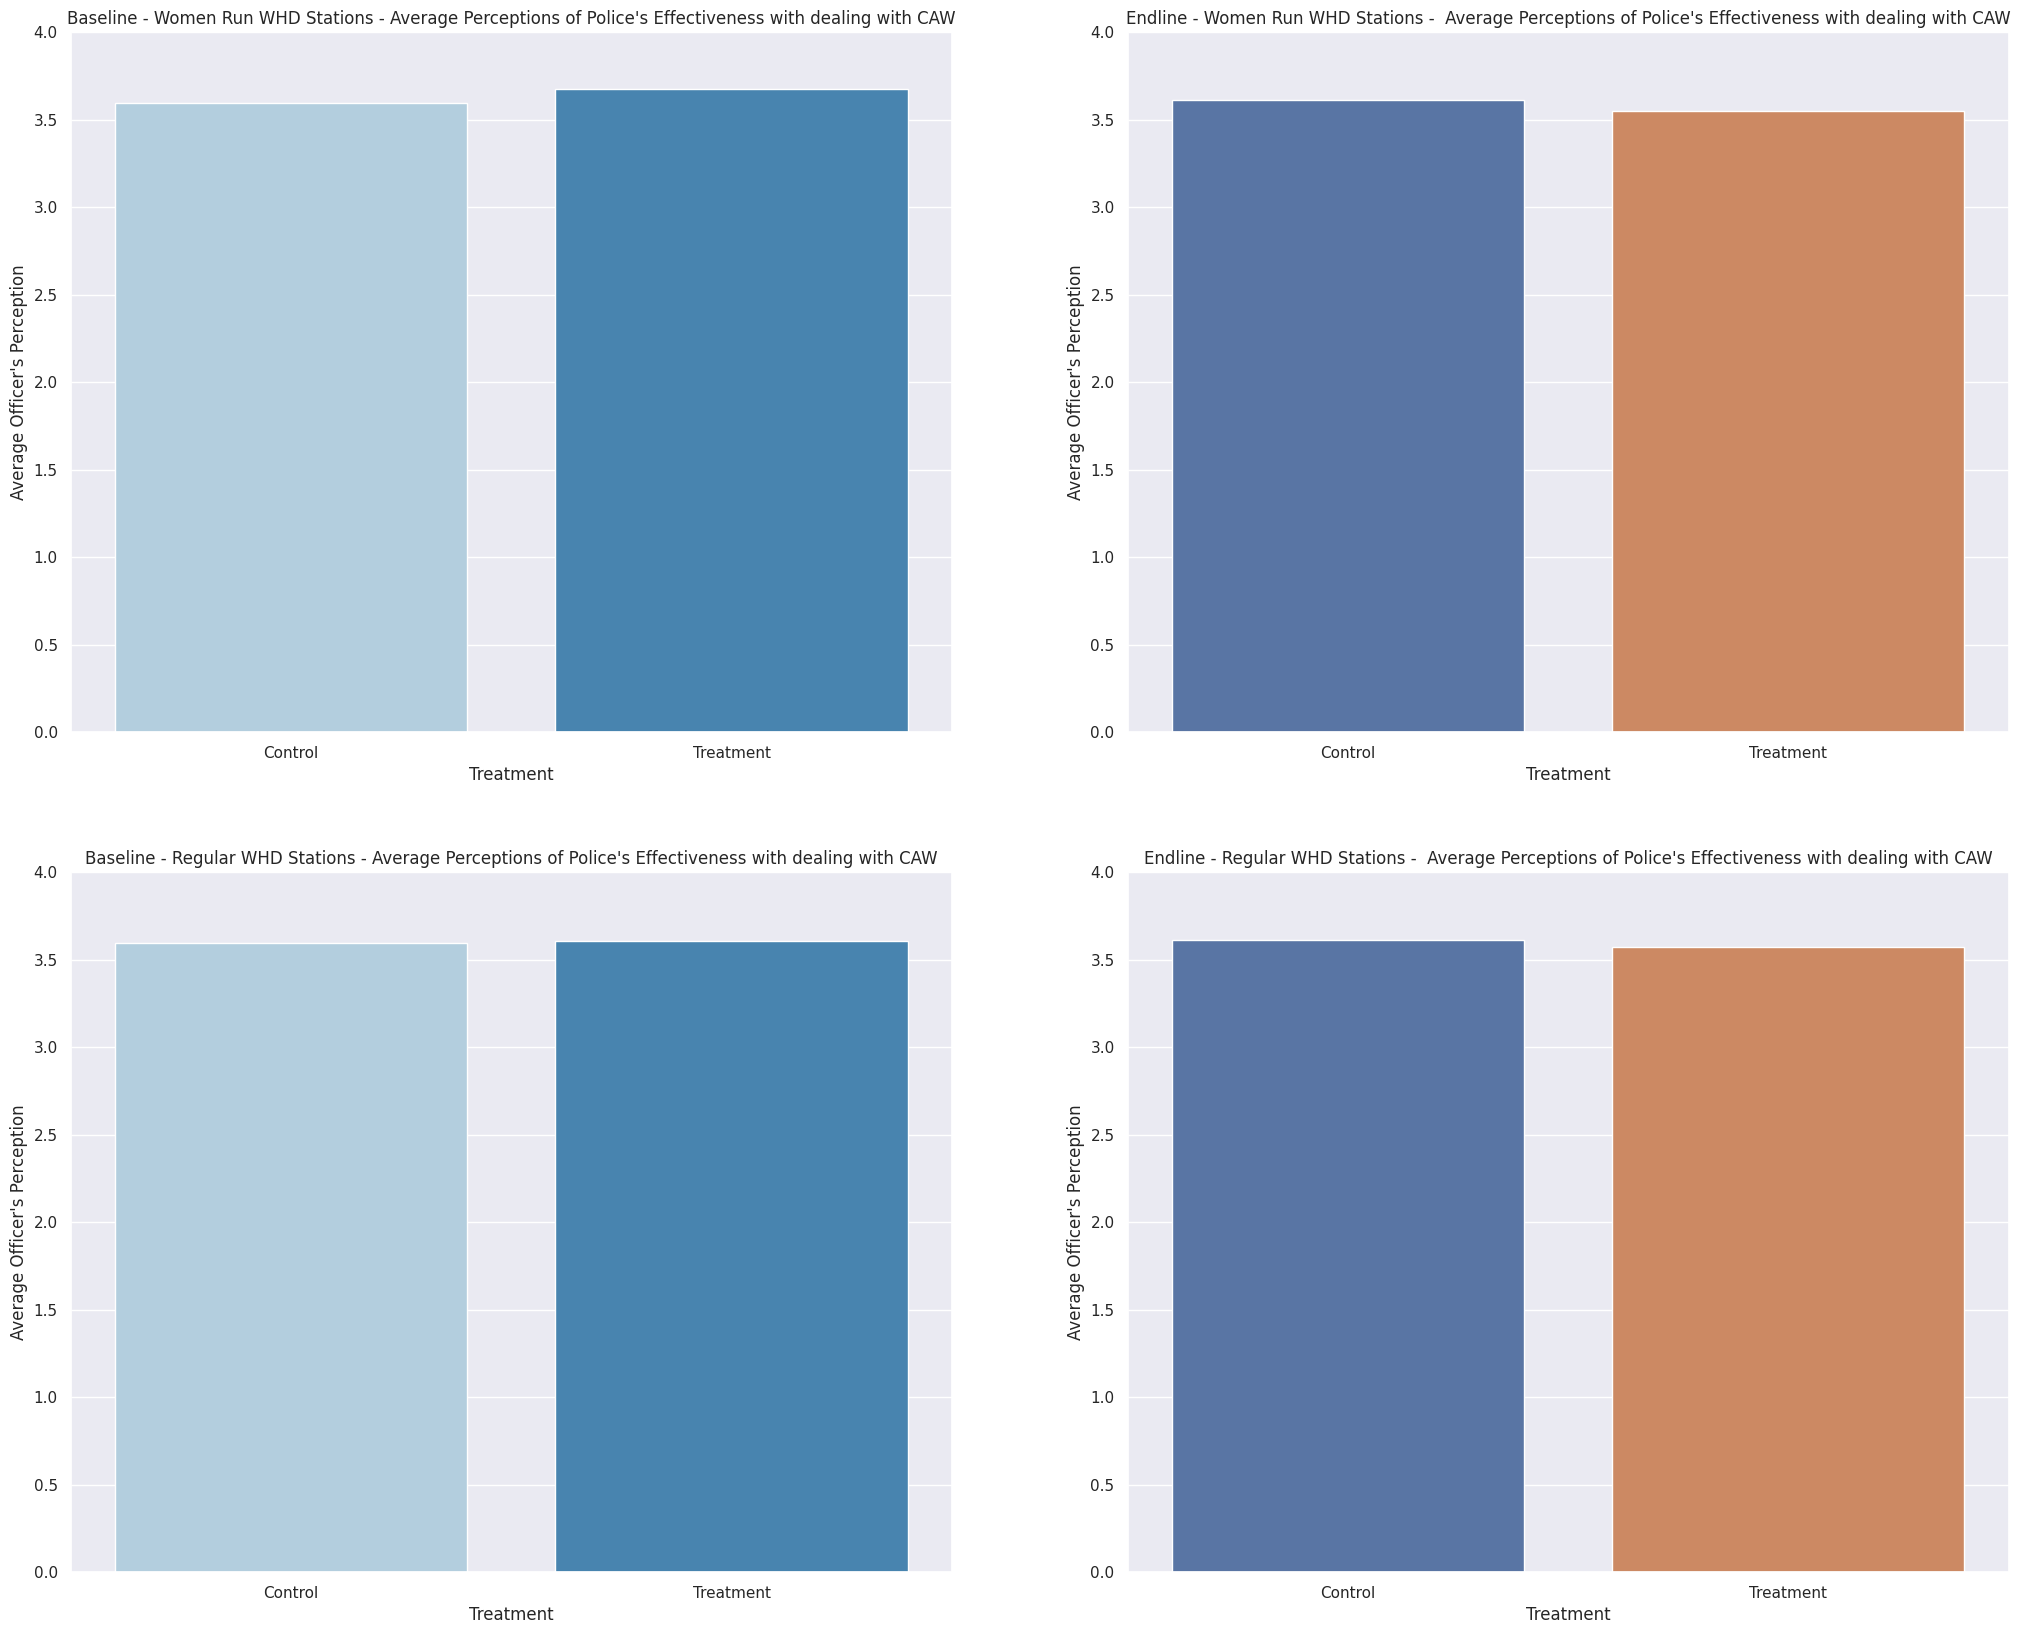

In [36]:
#Creating visuals for both treatment groups against the control group

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(25,20))

# Flatten axes array
axes = axes.flatten()

# Create a bar plot for Women Run
_ = sns.barplot(data = W_stats_df, x = W_stats_df.index , y = "b_effective_encoded", hue = W_stats_df.index, ax = axes[0], palette= "Blues")
_ = sns.barplot(data = W_stats_df, x = W_stats_df.index , y = "e_effective_encoded", hue = W_stats_df.index, ax = axes[1] )

#Create a bar plot for regualr police stations
_ = sns.barplot(data = Reg_stats_df, x = W_stats_df.index , y = "b_effective_encoded", hue = W_stats_df.index, ax = axes[2], palette= "Blues")
_ = sns.barplot(data = Reg_stats_df, x = W_stats_df.index , y = "e_effective_encoded", hue = W_stats_df.index, ax = axes[3] )

#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[1].set_title("Endline - Women Run WHD Stations -  Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[2].set_title("Baseline - Regular WHD Stations - Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[3].set_title("Endline - Regular WHD Stations -  Average Perceptions of Police's Effectiveness with dealing with CAW")
#setting axis labels
_ = axes[0].set_xlabel("Treatment")
_ = axes[1].set_xlabel("Treatment")
_ = axes[2].set_xlabel("Treatment")
_ = axes[3].set_xlabel("Treatment")

#Setting y variables
_ = axes[0].set_ylabel("Average Officer's Perception")
_ = axes[1].set_ylabel("Average Officer's Perception")
_ = axes[2].set_ylabel("Average Officer's Perception")
_ = axes[3].set_ylabel("Average Officer's Perception")

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,4])
  axes[i].set_autoscaley_on(False)



#Research question 2

## Does the presence of WHD change women's perceived effectiveness of police stations?

In [37]:
#imported df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/citizen_survey_clean_Q2.csv"

citizen_survey_df = pd.read_csv(data_file)

In [38]:
citizen_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           2533 non-null   int64  
 1   Unnamed: 0             2533 non-null   int64  
 2   uid                    2533 non-null   int64  
 3   b_visit                2533 non-null   float64
 4   b_pol_handling         2533 non-null   float64
 5   b_safety               2533 non-null   float64
 6   e_visit                2533 non-null   float64
 7   e_pol_handling         2533 non-null   float64
 8   e_safety               2533 non-null   float64
 9   e_gender               2533 non-null   object 
 10  hh_id                  2533 non-null   float64
 11  member_gender          2533 non-null   object 
 12  ps_code                2533 non-null   float64
 13  population             2533 non-null   int64  
 14  urban                  2533 non-null   object 
 15  dist

In [19]:
#drop redundant variable
citizen_survey_df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"], inplace = True)

In [20]:
citizen_survey_df.tail()

,uid,b_visit,b_pol_handling,b_safety,e_visit,e_pol_handling,e_safety,e_gender,hh_id,member_gender,...,urban,dist_urban,treatment,regular_whd,women_whd,attrited,e_gender_encoded,member_gender_encoded,urban_encoded,treatment_encoded
2528,80602421,0.0,0.000000,3.000000,0.0,0.000000,4.000000,Female,8060242.0,female,...,Rural,18.0,Treatment,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2529,80602431,0.0,0.000000,3.000000,0.0,1.000000,3.333333,Female,8060243.0,female,...,Rural,18.0,Treatment,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2530,80602461,0.0,0.800000,4.000000,0.0,1.000000,3.333333,Female,8060246.0,female,...,Rural,18.0,Treatment,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2531,80602471,0.0,0.500000,3.333333,0.0,1.000000,1.333333,Female,8060247.0,female,...,Rural,18.0,Treatment,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2532,80602481,0.0,0.666667,4.000000,0.0,0.333333,3.000000,Female,8060248.0,female,...,Rural,18.0,Treatment,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
citizen_survey_df.describe()

,Unnamed: 0.1,Unnamed: 0,uid,b_visit,b_pol_handling,b_safety,e_visit,e_pol_handling,e_safety,hh_id,ps_code,population,dist_urban,regular_whd,women_whd,attrited,e_gender_encoded,member_gender_encoded,urban_encoded,treatment_encoded
count,2533.000000,2533.000000,2.533000e+03,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2.533000e+03,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.0,2533.0,2533.0,2533.000000,2533.000000
mean,3276.363995,3276.363995,3.900410e+07,0.063166,0.344806,3.308988,0.084880,0.541865,3.179497,3.900410e+06,5927.620213,134120.510857,8.708251,0.329649,0.318200,0.0,0.0,0.0,0.446901,0.647848
std,1895.908610,1895.908610,2.049726e+07,0.243310,0.470612,0.464086,0.278757,0.456303,0.498814,2.049726e+06,3137.129020,89030.917921,4.915936,0.470178,0.465869,0.0,0.0,0.0,0.497271,0.477735
min,0.000000,0.000000,1.051201e+07,0.000000,-1.000000,1.000000,0.000000,-1.000000,1.000000,1.051201e+06,1001.000000,23565.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1685.000000,1685.000000,2.158206e+07,0.000000,0.000000,3.000000,0.000000,0.250000,3.000000,2.158206e+06,4049.000000,78500.000000,5.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,3260.000000,3260.000000,4.055230e+07,0.000000,0.375000,3.333333,0.000000,0.666667,3.333333,4.055230e+06,5089.000000,112157.000000,8.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000
75%,4924.000000,4924.000000,5.064242e+07,0.000000,0.714286,3.666667,0.000000,1.000000,3.500000,5.064242e+06,8133.000000,152000.000000,12.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000
max,6518.000000,6518.000000,8.060248e+07,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,8.060248e+06,12180.000000,545000.000000,18.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


#Observations

Why are there negative numbers in the x-Pol_handling columns? Will need to investigate

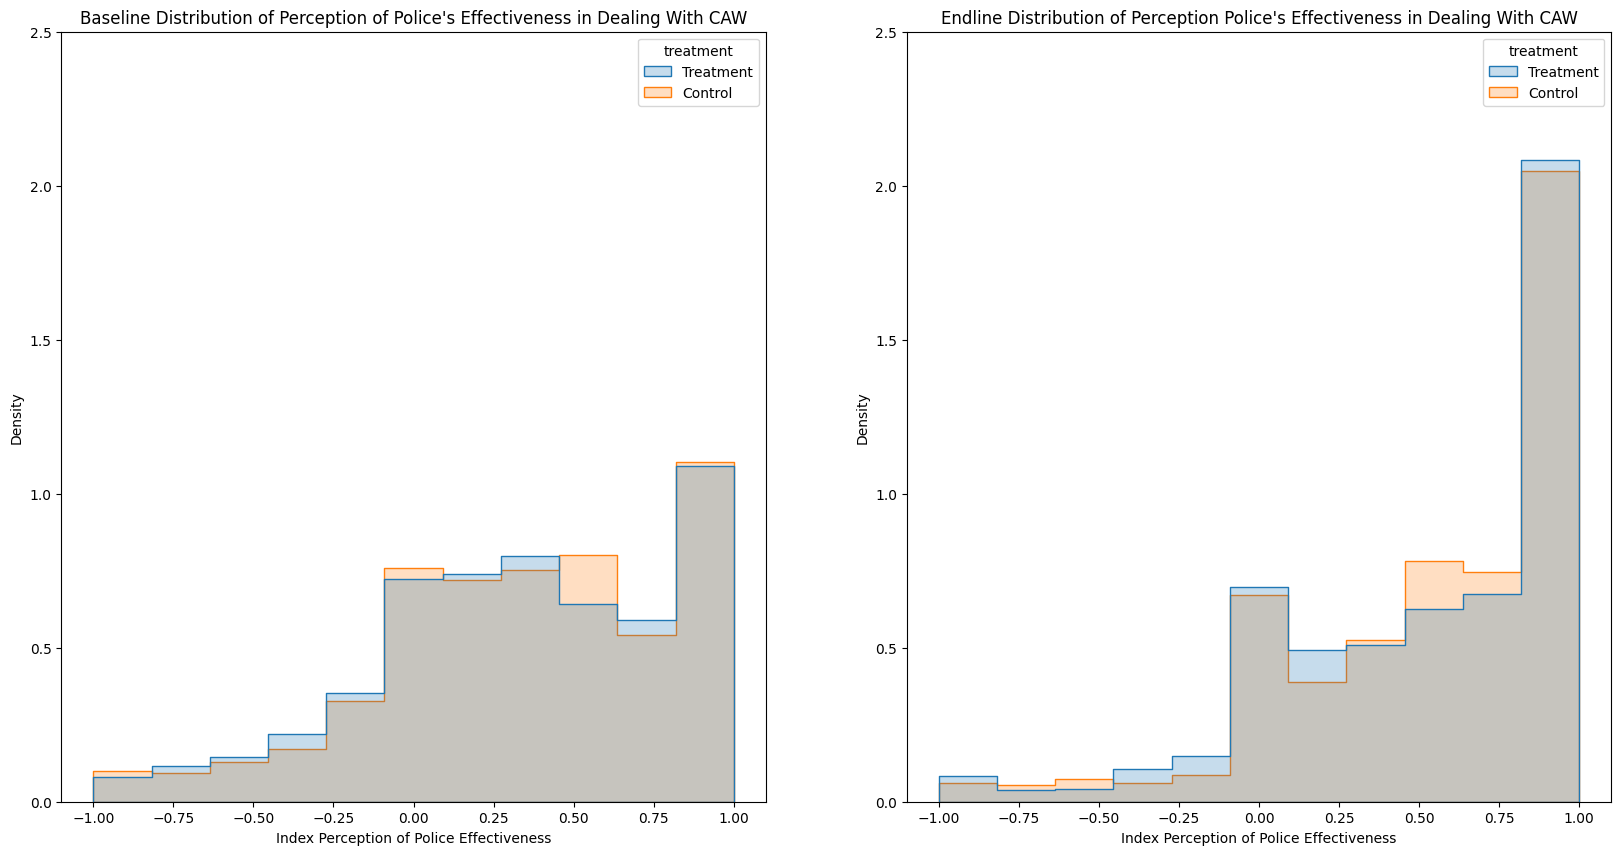

In [22]:
#Look at a visual of the values in e_pol-handle

# create the plot dimensions
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

_ = sns.histplot(data = citizen_survey_df, x = "b_pol_handling", bins = 11, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[0])
_ = sns.histplot(data = citizen_survey_df, x = "e_pol_handling", bins = 11, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[1])

_ = axes[0].set_title("Baseline Distribution of Perception of Police's Effectiveness in Dealing With CAW")
_ = axes[1].set_title("Endline Distribution of Perception Police's Effectiveness in Dealing With CAW")

_ = axes[0].set_xlabel("Index Perception of Police Effectiveness")
_ = axes[1].set_xlabel("Index Perception of Police Effectiveness")

#Setting Y axis range
for i in range(0,2):
  axes[i].set_ylim([0,2.5])
  axes[i].set_autoscaley_on(False)

Seems like the data ranges from -1 to 1. Presenting the data in a density plot allows us to compare the treatment and control groups regardless of their sample size. Using this, we are able to see that at endline for both the treatment and control group respondents report that they think the police are effective in dealing with CAW. This is interesting given the fact that in the control group nothing has really changed.



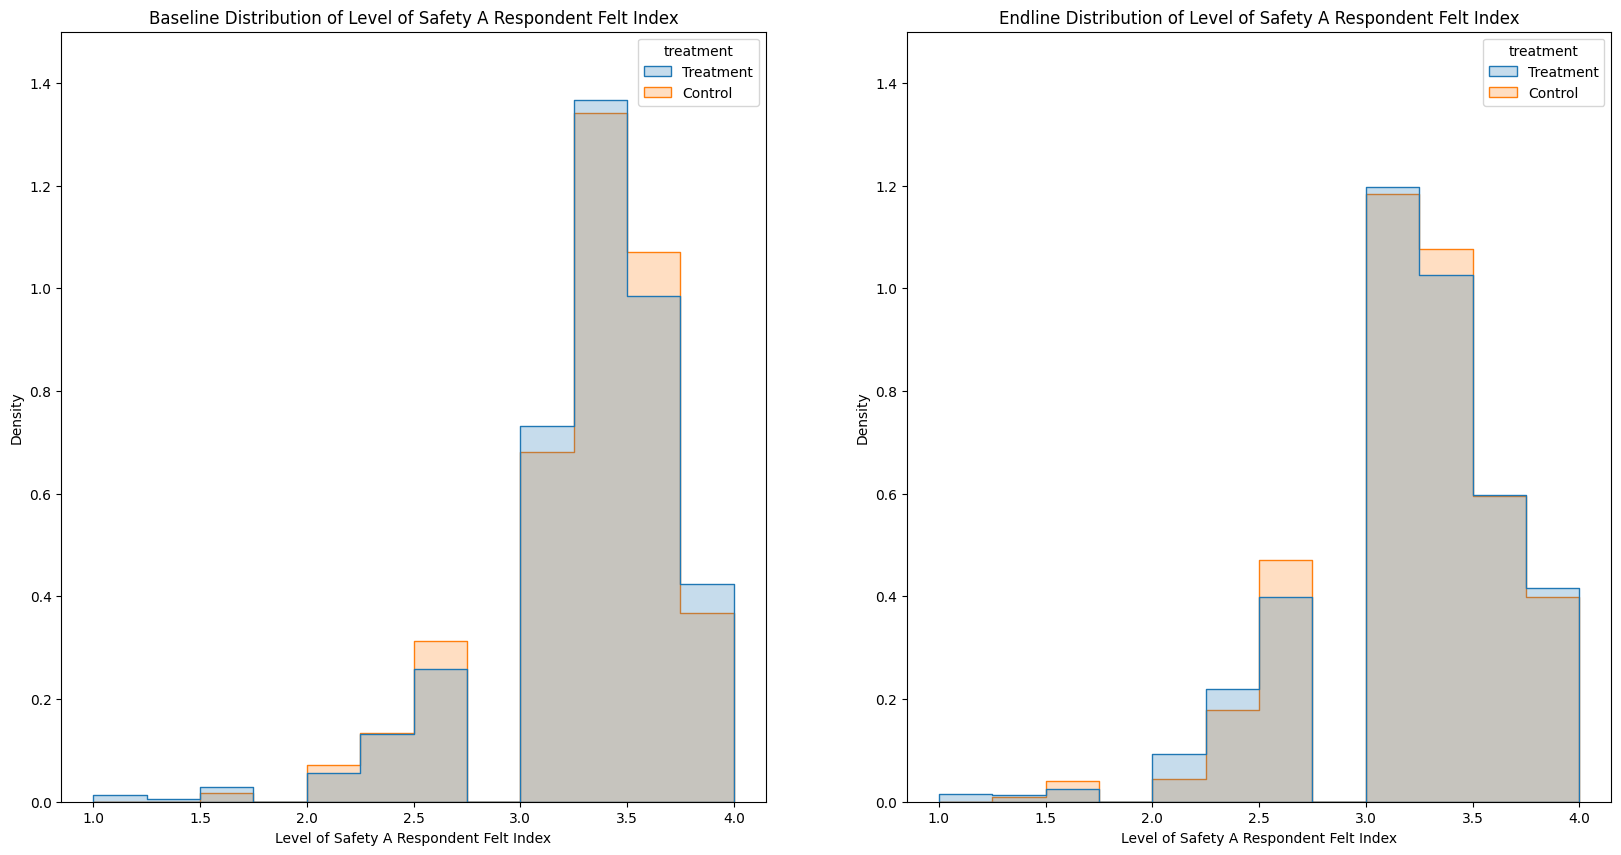

In [23]:
#Look at a visual of the values in b_safety

# create the plot dimensions
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

_ = sns.histplot(data = citizen_survey_df, x = "b_safety", bins = 12, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[0])
_ = sns.histplot(data = citizen_survey_df, x = "e_safety", bins = 12, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[1])

_ = axes[0].set_title("Baseline Distribution of Level of Safety A Respondent Felt Index")
_ = axes[1].set_title("Endline Distribution of Level of Safety A Respondent Felt Index")

_ = axes[0].set_xlabel("Level of Safety A Respondent Felt Index")
_ = axes[1].set_xlabel("Level of Safety A Respondent Felt Index")

#Setting Y axis range
for i in range(0,2):
  axes[i].set_ylim([0,1.5])
  axes[i].set_autoscaley_on(False)

At endline we can see that the concentation of responses at 3.5-4 is reduced. At the same time we see that the concentation of responses at 2.5 - 2.75 has increased. This gives a sign that a respondents saftey felt has decreased.


#Research question 3

##Can the distinction in FIR by women and other variables be utilized to distinguish if a station has a woman controlling the WHD?


In [40]:
#Import df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/admin_long_cleaned_Q4.csv"

admin_long_df = pd.read_csv(data_file, parse_dates=[2])

In [41]:
admin_long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0.1            4500 non-null   int64         
 1   Unnamed: 0              4500 non-null   int64         
 2   month                   4500 non-null   datetime64[ns]
 3   fir_overall_count       4500 non-null   int64         
 4   fir_caw_count           4500 non-null   int64         
 5   fir_bywomen_count       4500 non-null   int64         
 6   arrest_count            4500 non-null   int64         
 7   dir_count               4500 non-null   int64         
 8   ncr_count               4500 non-null   int64         
 9   ps_code                 4500 non-null   float64       
 10  urban                   4500 non-null   object        
 11  dist_urban              4500 non-null   float64       
 12  treatment               4500 non-null   object  

Let's start by separating the data into two groups. One group of the regular treatment and the other group with the WHD ran by women

In [42]:
#drop unnecessary variables
admin_long_df = admin_long_df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1","year_YYYY","month_MM"])

In [43]:
#Quick snapshot of the data

admin_long_df.head(10)

,month,fir_overall_count,fir_caw_count,fir_bywomen_count,arrest_count,dir_count,ncr_count,ps_code,urban,dist_urban,treatment,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,urban_encoded,treatment_encoded
0,2019-06-01,35,8,5,20,0,100,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
1,2019-11-01,29,10,4,10,1,0,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
2,2018-10-01,26,8,3,12,0,72,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
3,2018-11-01,27,8,4,12,0,64,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
4,2020-05-01,32,6,4,10,0,22,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
5,2018-08-01,27,12,5,15,0,52,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
6,2019-03-01,18,7,3,11,0,84,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
7,2018-06-01,45,17,5,27,0,101,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
8,2019-07-01,24,4,4,3,0,79,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0
9,2020-03-01,48,23,8,37,0,13,1001.0,Rural,1.0,Treatment,9.0,2.916667,2.2,0.0,1.0,0.0,1.0


In [44]:
#Making dataframe only containing the treatment groups

treatment_groups = admin_long_df[admin_long_df["treatment_encoded"] == 1 ]


In [45]:
treatment_groups.describe()

,month,fir_overall_count,fir_caw_count,fir_bywomen_count,arrest_count,dir_count,ncr_count,ps_code,dist_urban,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,urban_encoded,treatment_encoded
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,2019-05-01 23:02:23.999999744,33.199000,4.106000,2.672000,3.712667,0.748667,44.605333,5899.450000,8.675000,7.400000,2.717955,1.783083,0.508333,0.491667,0.450000,1.0
min,2018-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2018-11-01 00:00:00,19.000000,1.000000,1.000000,0.000000,0.000000,20.000000,3046.250000,4.000000,7.000000,2.178030,1.187500,0.000000,0.000000,0.000000,1.0
50%,2019-05-01 00:00:00,29.000000,3.000000,2.000000,2.000000,0.000000,37.000000,5092.500000,8.000000,8.000000,2.666352,2.100000,1.000000,0.000000,0.000000,1.0
75%,2019-11-01 00:00:00,43.000000,6.000000,4.000000,5.000000,0.000000,61.000000,8136.250000,12.000000,8.000000,3.617803,2.192500,1.000000,1.000000,1.000000,1.0
max,2020-05-01 00:00:00,419.000000,23.000000,11.000000,38.000000,33.000000,243.000000,12180.000000,18.000000,9.000000,4.583334,3.330000,1.000000,1.000000,1.000000,1.0
std,NaN,22.486306,3.843569,2.069584,4.961550,2.526452,34.463113,3125.934794,4.922139,1.519025,0.989359,0.763821,0.500014,0.500014,0.497577,0.0


In [46]:
treatment_groups.shape

(3000, 18)

I want to understand if WHD influence the average number of FIR reports. Let us create a visual showing the average FIR case reported per month by each treatment group.

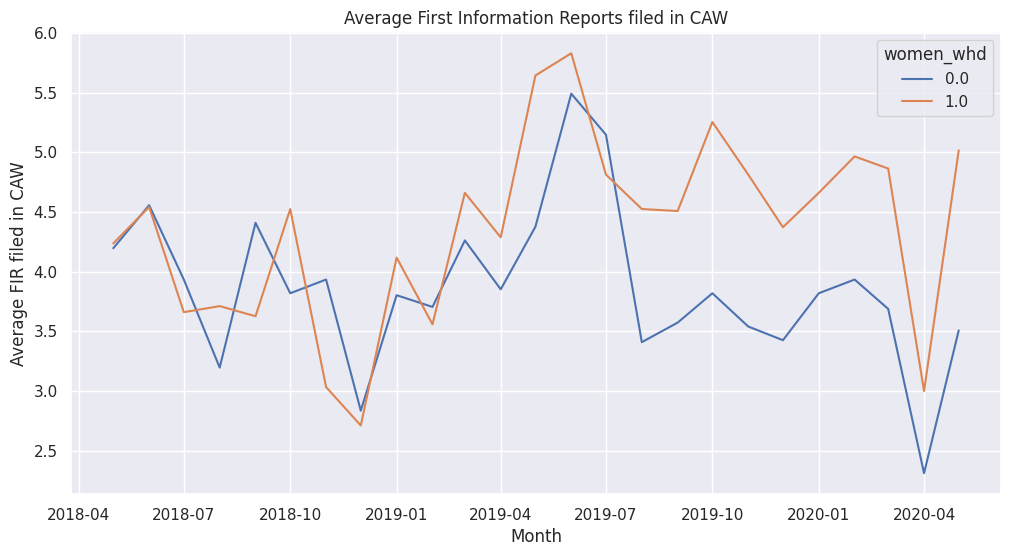

In [47]:
#Plotting monthly average
ling_fig = plt.figure(figsize = (12,6))

_ = sns.lineplot(data = treatment_groups,
    x = treatment_groups["month"],
    y = treatment_groups["fir_caw_count"],
                 hue= treatment_groups["women_whd"],
                 errorbar = None
)

_ = plt.title("Average First Information Reports filed in CAW")

_= plt.xlabel("Month")

_= plt.ylabel("Average FIR filed in CAW")

It looks like after the intervention of the treatment groups there was a significant increase in the monthly average FIR file in CAW. What is also noticeable is the stark difference between the two treatment groups. I wonder if it is possible to create a model that detects whether or not a police station has a women running the WHD.

First, let's filter the data from when the treatment began in May 2019 & the month before the pandemic

In [49]:
treatment_groups = treatment_groups[(treatment_groups["month"] >= '2019-05-01') & (treatment_groups["month"] <= '2020-04-01')]

Next, let's see what other variables have a positive correlation with WHDs

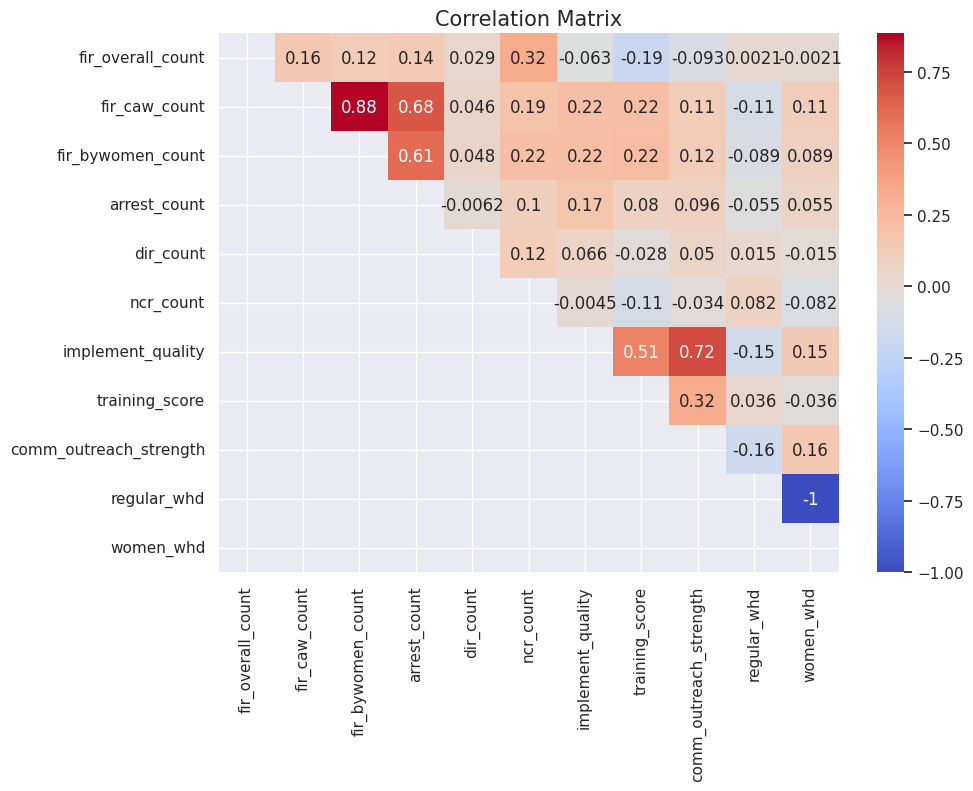

In [50]:
fig, ax = plt.subplots(figsize = (10,7))

#Creat numerical columns list

numerical_columns = [x for x in treatment_groups.columns if x not in ["month", "ps_code","dist_urban","treatment", "urban", "treatment_encoded", "urban_encoded"] ]

#Compute correlation values for the data

corr = treatment_groups[numerical_columns].corr()

# use triu to pick one side of the map to display

mask = np.tril(np.ones_like(corr))


_ = sns.heatmap(data = corr, annot= True, mask = mask, cmap='coolwarm')
_ = plt.title("Correlation Matrix", size = 15)

There are some variables with positive correlations against the Women_WHD variable. These variables are the implementation quality, community outreach strength, arrest count, and FIR by women to name a few. However, we do not see any strong correlations. An interesting finding is the data shows a positive correlation between FIR and arrests. It intuitively makes sense as more reported crime is occurring there should be more arrests to inflict penalties to the perpetrators.

Using this correlation matrix I will use a couple variables to train a logistic regression model


*   Arrest count
*   FIR CAW count
*   FIR by women count

I cannot use variables such as community strength and implementation quality as these variables are constant, much like police station ID.



Additionally, after seeing this correlation matrix it might be worth to see if we can model the number of arrest in relation to the number of FIR file in CAW and the number of FIR filed by women. This could show why at endline the civilian survey showed that women perceived the police to be more effective

In [ ]:
# Exporting the data

treatment_groups.to_csv("treatment_groups.csv")

from google.colab import files

files.download("treatment_groups.csv")
